In [1]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = r"/home/pyspark/spark-3.0.0-preview2-bin-hadoop2.7"

import findspark
findspark.init(r'/home/pyspark/spark-3.0.0-preview2-bin-hadoop2.7')


Source : https://www.analyticsvidhya.com/blog/2016/09/comprehensive-introduction-to-apache-spark-rdds-dataframes-using-pyspark/
        
         https://www.analyticsvidhya.com/blog/2016/10/using-pyspark-to-perform-transformations-and-actions-on-rdd/
            
        https://dwgeek.com/basic-spark-transformations-and-actions-using-pyspark.html/

Spark Context: It holds a connection with Spark cluster manager. All Spark applications run as independent set of processes, coordinated by a SparkContext in a program.

Driver and Worker: A driver is incharge of the process of running the main() function of an application and creating the SparkContext. A worker, on the other hand, is any node that can run program in the cluster. If a process is launched for an application, then this application acquires executors at worker node.

Cluster Manager: Cluster manager allocates resources to each application in driver program. There are three types of cluster managers supported by Apache Spark – Standalone, Mesos and YARN. Apache Spark is agnostic to the underlying cluster manager, so we can install any cluster manager, each has its own unique advantages depending upon the goal. They all are different in terms of scheduling, security and monitoring. Once SparkContext connects to the cluster manager, it acquires executors on a cluster node, these executors are worker nodes on cluster which work independently on each tasks and interact with each other.

In [2]:
from IPython.display import Image

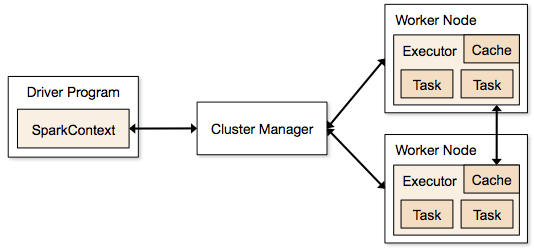

In [3]:
Image(filename='cluster.jpg')

Language Support: Apache Spark has API support for popular data science languages like Python, R, Scala and Java.

Supports Real time and Batch processing: Apache Spark supports “Batch data” processing where a group of transactions is collected over a period of time. It also supports real time data processing, where data is continuously flowing from the source. For example, weather information coming in from sensors can be processed by Apache Spark directly.

Lazy operation: Lazy operations are used to optimize solutions in Apache Spark. I will discuss about lazy evaluation in later part of this article. For now, we can think that there are some operations which do not execute until we require results.

Support for multiple transformations and actions: Another advantage of Apache Spark over Hadoop is that Hadoop supports only MapReduce but Apache Spark support many transformations and actions including MapReduce.

Apache Spark data representations: RDD / Dataframe / Dataset

Spark has three data representations viz RDD, Dataframe, Dataset. For each data representation, Spark has a different API. For example, later in this article I am going to use ml (a library), which currently supports only Dataframe API. Dataframe is much faster than RDD because it has metadata (some information about data) associated with it, which allows Spark to optimize query plan.

RDD:

After installing and configuring PySpark, we can start programming using Spark in Python. But to use Spark functionality, we must use RDD. RDD (Resilient Distributed Database) is a collection of elements, that can be divided across multiple nodes in a cluster to run parallel processing. It is also fault tolerant collection of elements, which means it can automatically recover from failures. RDD is immutable, we can create RDD once but can’t change it. We can apply any number of operation on it and can create another RDD by applying some transformations. Here are a few things to keep in mind about RDD:

 

We can apply 2 types of operations on RDDs:

Transformation: Transformation refers to the operation applied on a RDD to create new RDD.
Action: Actions refer to an operation which also apply on RDD that perform computation and send the result back to driver.

Example: Map (Transformation) performs operation on each element of RDD and returns a new RDD. But, in case of Reduce (Action), it reduces / aggregates the output of a map by applying some functions (Reduce by key). There are many transformations and actions are defined in Apache Spark documentation, I will discuss these in a later article.

RDDs use Shared Variable:

The parallel operations in Apache Spark use shared variable. It means that whenever a task is sent by a driver to executors program in a cluster, a copy of shared variable is sent to each node in a cluster, so that they can use this variable while performing task. Accumulator and Broadcast are the two types of shared variables supported by Apache Spark.
Broadcast: We can use the Broadcast variable to save the copy of data across all node.
Accumulator: In Accumulator variables are used for aggregating the information.

In [4]:
 from pyspark import SparkContext
 sc = SparkContext()

In [5]:
data = range(1,1000)
rdd = sc.parallelize(data)

In [6]:
type(rdd)

pyspark.rdd.PipelinedRDD

In [7]:
rdd.first()

1

In [8]:
for i in rdd.take(10):
    print(i)

1
2
3
4
5
6
7
8
9
10


Step : Map Transformation

In [13]:
data = ['Hello' , 'I' , 'AM', 'Vinod', 'Vukkalam']
rdd_name = sc.parallelize(data)

In [14]:
Rdd1 = rdd_name.map(lambda x: (x,1))

In [15]:
Rdd1

PythonRDD[7] at RDD at PythonRDD.scala:53

In [16]:
list1 = Rdd1.collect()

In [17]:
list1

[('Hello', 1), ('I', 1), ('AM', 1), ('Vinod', 1), ('Vukkalam', 1)]

In [18]:
type(list1)

list

In [19]:
rdd_name.count()

5

Transformation: Transformation refers to the operation applied on a RDD to create new RDD. Filter, groupBy and map are the examples of transformations.

Actions: Actions refer to an operation which also applies on RDD, that instructs Spark to perform computation and send the result back to driver. This is an example of action.

The Transformations and Actions in Apache Spark are divided into 4 major categories:

     General
     Mathematical and Statistical
     Set Theory and Relational
     Data-structure and IO


In [20]:
rdd_blog = sc.textFile("blogtexts.txt")

In [21]:
rdd_blog.first()

'Think of it for a moment – 1 Qunitillion = 1 Million Billion! Can you imagine how many drives / CDs / Blue-ray DVDs would be required to store them? It is difficult to imagine this scale of data generation even as a data science professional. While this pace of data generation is very exciting,  it has created entirely new set of challenges and has forced us to find new ways to handle Big Huge data effectively.'

In [22]:
rdd1 = rdd_blog.map(lambda c:c.lower().split())

In [23]:
rdd1.take(5)

[['think',
  'of',
  'it',
  'for',
  'a',
  'moment',
  '–',
  '1',
  'qunitillion',
  '=',
  '1',
  'million',
  'billion!',
  'can',
  'you',
  'imagine',
  'how',
  'many',
  'drives',
  '/',
  'cds',
  '/',
  'blue-ray',
  'dvds',
  'would',
  'be',
  'required',
  'to',
  'store',
  'them?',
  'it',
  'is',
  'difficult',
  'to',
  'imagine',
  'this',
  'scale',
  'of',
  'data',
  'generation',
  'even',
  'as',
  'a',
  'data',
  'science',
  'professional.',
  'while',
  'this',
  'pace',
  'of',
  'data',
  'generation',
  'is',
  'very',
  'exciting,',
  'it',
  'has',
  'created',
  'entirely',
  'new',
  'set',
  'of',
  'challenges',
  'and',
  'has',
  'forced',
  'us',
  'to',
  'find',
  'new',
  'ways',
  'to',
  'handle',
  'big',
  'huge',
  'data',
  'effectively.'],
 [],
 ['big',
  'data',
  'is',
  'not',
  'a',
  'new',
  'phenomena.',
  'it',
  'has',
  'been',
  'around',
  'for',
  'a',
  'while',
  'now.',
  'however,',
  'it',
  'has',
  'become',
  'reall

In [24]:
rdd3 = rdd_blog.flatMap(lambda c: c.lower().split())
rdd3.take(5)

['think', 'of', 'it', 'for', 'a']

With Map transformation, Output is too long so, I have just attached a snippet of it. We can also see that our output is not flat (it’s a nested list). So for getting the flat output, we need to apply a transformation which will flatten the output, The transformation “flatMap” will help here:

The “flatMap” transformation will return a new RDD by first applying a function to all elements of this RDD, and then flattening the results. This is the main difference between the “flatMap” and map transformations. Let’s apply a “flatMap” transformation on “rdd” , then take the result of this transformation in “rdd2” and print the result after applying this transformation.

In [25]:
stopwords = ['is','am','are','the','for','a']
rdd5 = rdd_blog.filter(lambda x: x not in stopwords)
rdd5.take(10)

['Think of it for a moment – 1 Qunitillion = 1 Million Billion! Can you imagine how many drives / CDs / Blue-ray DVDs would be required to store them? It is difficult to imagine this scale of data generation even as a data science professional. While this pace of data generation is very exciting,  it has created entirely new set of challenges and has forced us to find new ways to handle Big Huge data effectively.',
 '',
 'Big Data is not a new phenomena. It has been around for a while now. However, it has become really important with this pace of data generation. In past, several systems were developed for processing big data. Most of them were based on MapReduce framework. These frameworks typically rely on use of hard disk for saving and retrieving the results. However, this turns out to be very costly in terms of time and speed.',
 '',
 'On the other hand, Organizations have never been more hungrier to add a competitive differentiation through understanding this data and offering it

In [27]:
stopwords = ['is','am','are','the','for','a']
rdd6 = rdd3.filter(lambda x: x not in stopwords)
rdd6.take(10)

['think', 'of', 'it', 'moment', '–', '1', 'qunitillion', '=', '1', 'million']

Transformation: groupBy

(Q): After getting the results into rdd6, we want to group the words in rdd6 based on which letters they start with. For example, suppose I want to group each word of rdd6 based on first 3 characters.

Solution: The “groupBy”  transformation will group the data in the original RDD. It creates a set of key value pairs, where the key is output of a user function, and the value is all items for which the function yields this key.

    We have to pass a function (in this case, I am using a lambda function) inside the “groupBy” which will take the first 3 characters of each word in “rdd6”.
    The key is the first 3 characters and value is all the words which start with these 3 characters.

After applying “groupBy” function, we store the transformed result in “rdd7” (RDDs are immutable – remember!). To view “rdd7”, we can print first (key, value) elements in “rdd7”.

In [29]:
rdd7 = rdd6.groupBy(lambda w: w[0:3])


In [30]:
print([(k, list(v)) for (k, v) in rdd7.take(1)])

[('thi', ['think', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'think', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'things', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this', 'this.', 'this', 'this', 'things', 'this', 'this', 'this'])]
